## Social Networks Assignment

We begin with some of the notation introduced in the text.

$$
   \begin{array}[t]{llp{5in}}
   d(i,j)     &  &\text{the length of the shortest path between nodes $i$ and $j$}\\
  \text{N}_{j} &  & \text{the (set of) neighbors of node $j$}\\
   \mid \text{N}_{j} \mid &  & \text{the number of neighbors node $j$ has in the graph}\\
   \text{E}(\text{S}) &  & \text{the set of edges for some set of nodes S}\\
   \text{E}(\text{N}_{j}) & & \text{the set of edges among the neighbors of $j$}\\
   \mid \text{E}(\text{N}_{j})\mid & & \text{the number of edges among the neighbors of $j$}\\
   {k \choose 2} &  \frac{k(k-1)}{2} & \text{the number of possible pairs for a set of $k$ things} \\[.05in]
   {\mid \text{N}_{j} \mid \choose 2} &\frac{\mid \text{N}_{j} \mid(\mid \text{N}_{j} \mid-1)}{2} & \text{the number of possible edges connecting neighbors of $j$} \\[.05in]
   \text{APL}(\text{G}) & \frac{1}{{N \choose 2}} \sum_{i,j} d(i,j) &\text{the average path length in graph G, the sum of the shortest paths between all node
                                                   pairs,}\\
                            & & \text{divided by ${{N \choose 2}}$, the number of node pairs in graph G}
   \end{array}
$$


Note that $i$ is not in the neighborhood set $\text{N}_{i}$.
Then the **clustering coefficient** for a **node** $i$, 
written $\text{C}_{i}$, is defined as

$$
\text{C}_{i} = \frac{\mid \text{E}(\text{N}_{i}) \mid}{ {\mid \text{N}_{i} \mid \choose 2}}
$$

As stated above 

$${\mid \text{N}_{i} \mid \choose 2}$$

is the maximum possible number of edges connecting neighbors of $i$ (the number
of edges there would be if all of $i$s friends knew each other),
so $\text{C}_{i}$ is the number of **actual** connections between
neighbors of :math:`i` divided by the maximum **possible** number of
connections between neighbors of $i$.  The clustering
coefficient of a **graph** is just the average of this number for all 
nodes in a graph.

As an example,  consider node `E` in the following graph (similar to the one discussed in the text):


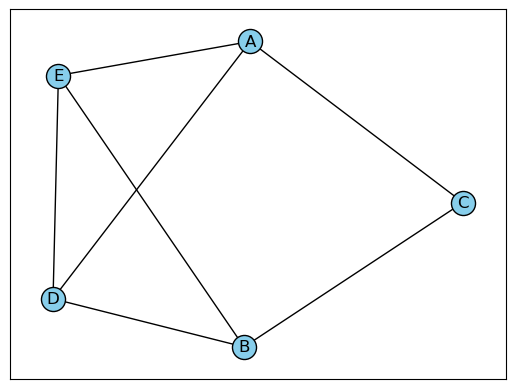

In [9]:
import networkx as nx
G = nx.Graph()


# This is the one we'll start with for this problem set
edges = \
"""
D E
D B
E B
E A
C A
C B
A D
"""
G0 = nx.parse_edgelist(edges.split('\n'))
# Try removing edgecolors = 'k' to see what happens.
nx.draw_networkx(G0,node_color='skyblue',edgecolors='k')

E has three neighbors, A, B and D. 

The maximum number of connections those three neighbors could have is three.

In [19]:
E_deg = nx.degree(G0)['E']
max_conn = (E_deg * (E_deg - 1))/2
E_deg, max_conn

(3, 3.0)

In fact, two of three possible connections exist: `B` connects to `D`
and `A` connects to `D` (but `B` fails to connect to `A`).

We show the code to prove that:

In [20]:
ctr = 0
for n0 in G0['E']: # loop through E's neighbors
    for n1 in G0[n0]: # loop through n0's neighbors
        if n1 in G0['E']: # n0 is connected to a neighbor of 'E'
            ctr += 1
# This is an undirected graph so we discover each connection twice.
# Divide by two to get the number of actual connections
actual_conn = ctr/2
actual_conn

2.0

In [15]:
clustering_coefficient_E = actual_conn/max_conn
clustering_coefficient_E

0.6666666666666666

We compare this with the `networkx` computation.
The `nx.clustering` function returns a dictionary with nodes as keys and 
clustering coefficients as values:

In [18]:
nx.clustering(G0)['E']

0.6666666666666666

For the exercise below, use **Graph 1**:

####  Graph 1

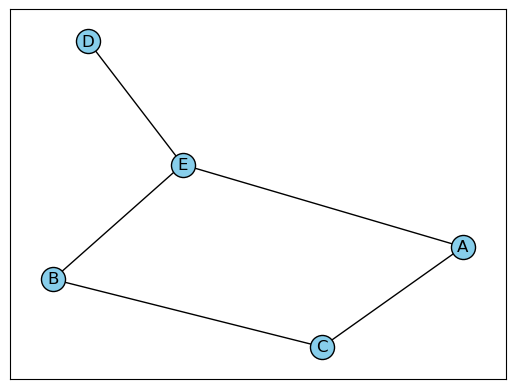

In [1]:
import networkx as nx
G = nx.Graph()


# This is the one we'll start with for this problem set
edges = \
"""
D E
E B
E A
C A
C B
"""
G = nx.parse_edgelist(edges.split('\n'))
# Try removing edgecolors = 'k' to see what happens.
nx.draw_networkx(G,node_color='skyblue',edgecolors='k')

**Q1**

Using `G` (Graph 1) as drawn above, write out the betweenness centrality calculation for node E, using the
definition of betweenness centrality for a node given in the
text chapter.

We reproduce that definition here, for convenience:

We define the **betweenness centrality** of node $j$, $\text{Betweenness}_{j}$ as

$$
   \begin{array}[t]{l}
   \text{Betweenness}_{j} = \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
   \end{array}
$$

Here $\sigma_{ik}$ is the total number of shortest paths
from $i$ to $k$; and  $\sigma_{ik}(j)$ is the total
number of such paths which pass through $j$.  The expression
to the right of $\sum$ is proportion of all shortest paths
between $i$ and $k$ that pass through $j$.
The symbol $\sum$ indicates
we sum that quantity for various $i$ and $k$, and
the little subscript tells us $i\neq j\neq k$; that is, we find that quantity
for all distinct nodes $i,k$ in the graph that are also distinct from $j$.

And we add up the results.  Roughly what we're calculating is: What proportion
of the shortest paths in the graph pass through $j$? Or what proportion
of the traffic taking a shortest path journey has to pass through $j$. 

To see an example of writing out the calculation (on a different graph!) 
look back at the textbook discussion.


**Q2**

How does the betweenness computation for node E in G 
change if we add an edge between C and E as shown in **Graph 2** below?


#### Graph 2

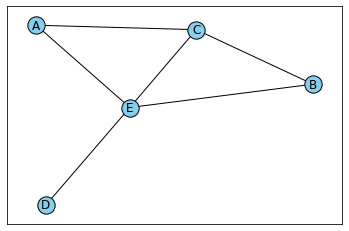

In [45]:
edges2 = \
"""
D E
E B
E A
C A
C B
C E
"""
G2 = nx.parse_edgelist(edges2.split('\n'))
nx.draw_networkx(G2,node_color='skyblue',edgecolors='k')

**Q3**

How does the betweenness computation for node E change if we add an edge between A  and B as shown in **Graph 3** below?

#### Graph 3

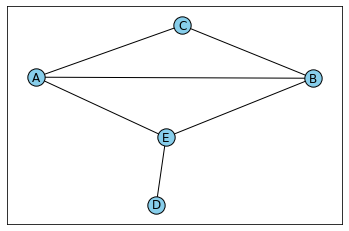

In [44]:
edges3 = \
"""
D E
E B
E A
C A
C B
A B
"""
G3 = nx.parse_edgelist(edges3.split('\n'))
nx.draw_networkx(G3,node_color='skyblue',edgecolors='k')

**Q4**

Betweenness centrality is often normalized to give a score between 0 and 1. To see how this works, note that each of the terms in the betweenness sum is a number between 0 and 1. We just take their average. Graphs 1,2 and 3 above all have the same number of nodes, therefore the same number of pairs, so in all cases we divide by 6. For the first example, 3.5/6 is .583. The general expression for the number of possible pairs of k things is given in the table above:

$\frac{k(k-1)}{2}$

If we have a graph of n nodes, the betweenness computation for any one of them will involve n-1 other nodes, so the number of possible pairs of n-1 things is

$\frac{(n-1)(n-2)}{2}$

For example, the graph above has 5 nodes, so in computing the betweeneness of any node j, we have $\frac{(5-1)(5-2)}{2} = 6$ pairings of other nodes. The normalized betweenness divides the betweenness by that number to get the average betweenness score for paths through j.

$$
\begin{array}[t]{l}
\text{Norm-Betweenness}_{j} = \frac{2}{(n-1)(n-2)} \sum_{i\neq j\neq k} \frac{\sigma_{ik}(j)}{\sigma_{ik}},
\end{array}
$$

Compute the normalized betweenness for the **graph** in Question 2.

**Q5** What is the **degree centrality** of node E in the graph in Question 2?
Show your calculation.  Use `networkx` to check your calculation (the  `networkx` `degree_centrality`
function is demoed un the using_networkx.ipynb notebook, and so is computing the calculation by hand.)

**Q6** What is the clustering coefficient for node E in the graph in Question 2?
Show your calculation.
Use `networkx` to check your calculation.

**Q7** What is the average shortest path length in the graph in Question 2? 
Show your calculations (you don't have to code this up, just show each node
pair and nthe length of the shortest path between them). Use networkx to check your calculations.
Look [here](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
in the `networkx` docs for a discussion of `nx.average_shortest_path_length`.

### More on clustering coefficients

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks. In the next few cells we load the karate graph and create a random graph.  Compute the clustering coefficent of both using `networkx`. Try to **guess** the clustering coefficient of the random graph even before you compute it.  Is the clustering coefficient of the karate graph higher or lower than that of the random graph? Is that what you expect given that social networks are small worlds?

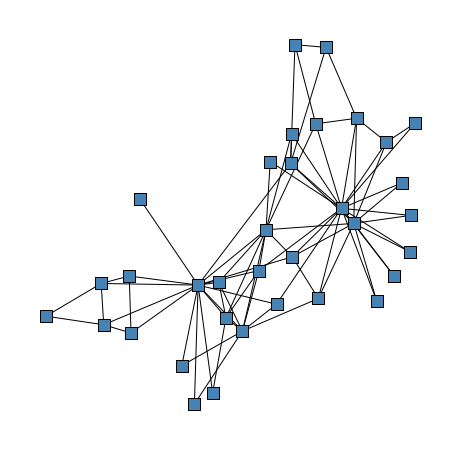

In [31]:
import networkx as nx
from matplotlib import pyplot as plt
(f,ax) = plt.subplots(1,1,figsize=(8,8))
kn = nx.karate_club_graph()
# some node shapes: 'd': 'diamond, 'o' : circle, *: star,...
# circle is default
nx.draw_spring(kn,node_size=150,node_color='steelblue',node_shape='s',edgecolors='k')

In [48]:
G = nx.erdos_renyi_graph(100,0.11)
# Compute layout only
pos = nx.spring_layout(G)

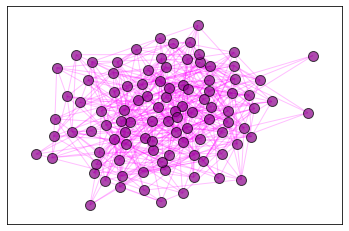

In [53]:
#separate cell to allow tinkering with drawing params without expensive recomputation of layout 
##Lots of edges in .11 prob random graph with 100 nodes.  Draw in lighter (alpha=.3)
nx.draw_networkx_edges(G,pos,alpha=.25,edge_color ='magenta')
## Nodes use default alpha value
nx.draw_networkx_nodes(G,pos,node_color='darkmagenta',edgecolors='k',node_size=100,alpha=.7)


## Centrality and Florentine families

The next graph is a famous graph of Florentine families.   The data used to build this graph is taken directly
from Breiger and Pattison (1986).

>Breiger, R.L. and Pattison, P.E., 1986. Cumulated social roles: The duality of persons and their algebras. Social networks, 8(3), pp.215-256. [http://commres.net/wiki/_media/cumulated-social-roles-the-duality-of-persons-and-their-algebras.pdf](http://commres.net/wiki/_media/cumulated-social-roles-the-duality-of-persons-and-their-algebras.pdf)


The data is attributed to Padgett and Angell, who published a far more detailed study with
many more variables defining the social network in Padgett and Ansell (1993).

>Padgett, John F., and Christopher K. Ansell. 1983. "Robust Action and the Rise of the Medici: 1400-1434." American Journal of Sociology pp. 1259-1319.  [https://www.stats.ox.ac.uk/~snijders/PadgettAnsell1993.pdf](https://www.stats.ox.ac.uk/~snijders/PadgettAnsell1993.pdf)

In the graph implemented in `networkx`, a link simply represents marriage between members of the families.  Marriage between families was a recognized way
of creating alliances and obligation, and therefore a way of consolidating or extending power.  
This is an undirected graph. Therefore a link is simply a link and doesn't directly represent who owes who, or who has the power. In Padgett and Christopher's discussion, marriage between families is represented by a directed link,
because it matters which family contributed the groom and which family contributed the bride; this
is just one small way in which the graph we analyze below represents a simplification of complex social
facts.

In [21]:
ff = nx.florentine_families_graph()

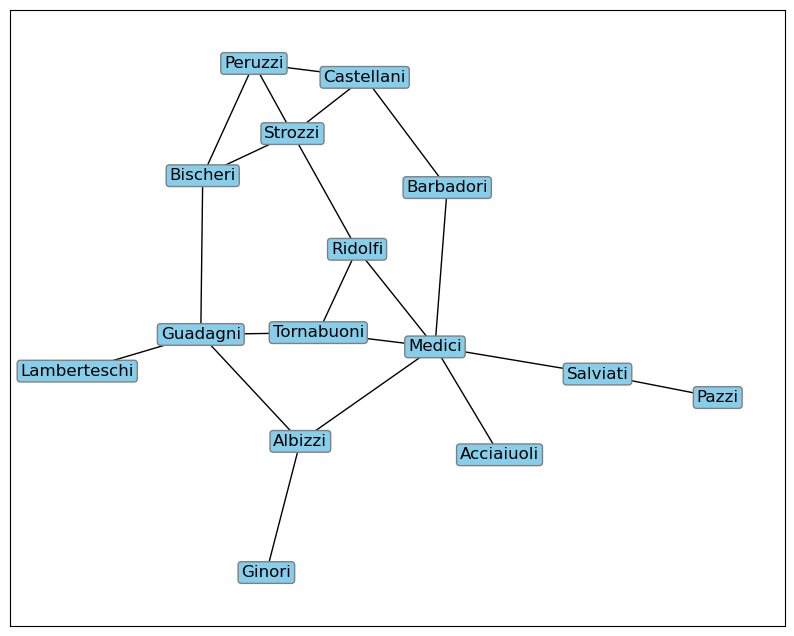

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8)) 
nx.draw_networkx(ff, with_labels=True, node_shape = 's', node_color="none", 
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'))

#### Q8

**Part I**: In the using_networkx notebook, `betweenness centrality` and `degree centrality` measures
were computed for the karate graph. Now compute both those centralities
for the Florentine Families graph.  How
well do these two measures correlate? To compute the correlation, use `scipy.stats.pearsonr`, which takes two
sequences of numbers, `s1` and `s2`, where the number at `s1[i]` **corresponds to** the number at `s2[i].` That
is, `s1[i]` and `s2[i]` should be centrality scores for the same node.

**Part II**:  Which measure does a better job representing the relative powers of
the families, at least as regards to who is the most powerful family?
(Have a look at the Padgett and Ansell paper to see who it should be).

**Part III**:  Look at a case for which the two measures differ significantly, the Peruzzi family.  What is
the rank of the Peruzzi family by Betweenness Centrality?  What is their rank by Degree Centrality?
(Code this up, by sortin the centrality scores.
Speculate as to which measure is doing a better job of
representing power in the world, using only facts apparent from the graph.

**Part IV**:  Find two families whose importance is identical according to **both**
measures, and argue using facts deduceable from the graph, that something is being missed.